In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
# The aim of this study is to investigate the factors influencing the salaries of Data Scientists.
# To achieve this, a dataset containing various relevant variables was utilized. This report describes the exploratory
# analysis conducted to understand the relationship between these factors and Data Scientists' salaries.

# Data Collection

In [3]:
# ds_salaries.csv from kaggle

# Reading The Data

In [4]:
data = pd.read_csv('ds_salaries.csv')

# Viewing The Data

In [5]:
data = pd.read_csv('ds_salaries.csv')

In [6]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
data.shape

(3755, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
# The dataset comprises of 3755 rows and 11 columns. 7 of the 11 columns are object datatypes. While only 4 are integer.
# The information in the dataset also shows that there are no missing values. And the memory usage is 322.8+ KB.

# Data Cleaning and Preparation

In [10]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
data.duplicated().any()

True

In [12]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
data.notna().sum()

work_year             3755
experience_level      3755
employment_type       3755
job_title             3755
salary                3755
salary_currency       3755
salary_in_usd         3755
employee_residence    3755
remote_ratio          3755
company_location      3755
company_size          3755
dtype: int64

In [14]:
data['experience_level'].unique().tolist()

['SE', 'MI', 'EN', 'EX']

In [15]:
data['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [16]:
data['employment_type'].unique().tolist()

['FT', 'CT', 'FL', 'PT']

In [17]:
data['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [18]:
data['job_title'].unique().tolist()

['Principal Data Scientist',
 'ML Engineer',
 'Data Scientist',
 'Applied Scientist',
 'Data Analyst',
 'Data Modeler',
 'Research Engineer',
 'Analytics Engineer',
 'Business Intelligence Engineer',
 'Machine Learning Engineer',
 'Data Strategist',
 'Data Engineer',
 'Computer Vision Engineer',
 'Data Quality Analyst',
 'Compliance Data Analyst',
 'Data Architect',
 'Applied Machine Learning Engineer',
 'AI Developer',
 'Research Scientist',
 'Data Analytics Manager',
 'Business Data Analyst',
 'Applied Data Scientist',
 'Staff Data Analyst',
 'ETL Engineer',
 'Data DevOps Engineer',
 'Head of Data',
 'Data Science Manager',
 'Data Manager',
 'Machine Learning Researcher',
 'Big Data Engineer',
 'Data Specialist',
 'Lead Data Analyst',
 'BI Data Engineer',
 'Director of Data Science',
 'Machine Learning Scientist',
 'MLOps Engineer',
 'AI Scientist',
 'Autonomous Vehicle Technician',
 'Applied Machine Learning Scientist',
 'Lead Data Scientist',
 'Cloud Database Engineer',
 'Financial

In [19]:
data['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [20]:
data['salary_currency'].unique().tolist()

['EUR',
 'USD',
 'INR',
 'HKD',
 'CHF',
 'GBP',
 'AUD',
 'SGD',
 'CAD',
 'ILS',
 'BRL',
 'THB',
 'PLN',
 'HUF',
 'CZK',
 'DKK',
 'JPY',
 'MXN',
 'TRY',
 'CLP']

In [21]:
data['salary_currency'].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [22]:
data['employee_residence'].unique().tolist()

['ES',
 'US',
 'CA',
 'DE',
 'GB',
 'NG',
 'IN',
 'HK',
 'PT',
 'NL',
 'CH',
 'CF',
 'FR',
 'AU',
 'FI',
 'UA',
 'IE',
 'IL',
 'GH',
 'AT',
 'CO',
 'SG',
 'SE',
 'SI',
 'MX',
 'UZ',
 'BR',
 'TH',
 'HR',
 'PL',
 'KW',
 'VN',
 'CY',
 'AR',
 'AM',
 'BA',
 'KE',
 'GR',
 'MK',
 'LV',
 'RO',
 'PK',
 'IT',
 'MA',
 'LT',
 'BE',
 'AS',
 'IR',
 'HU',
 'SK',
 'CN',
 'CZ',
 'CR',
 'TR',
 'CL',
 'PR',
 'DK',
 'BO',
 'PH',
 'DO',
 'EG',
 'ID',
 'AE',
 'MY',
 'JP',
 'EE',
 'HN',
 'TN',
 'RU',
 'DZ',
 'IQ',
 'BG',
 'JE',
 'RS',
 'NZ',
 'MD',
 'LU',
 'MT']

In [23]:
data['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [24]:
data['company_location'].unique().tolist()

['ES',
 'US',
 'CA',
 'DE',
 'GB',
 'NG',
 'IN',
 'HK',
 'NL',
 'CH',
 'CF',
 'FR',
 'FI',
 'UA',
 'IE',
 'IL',
 'GH',
 'CO',
 'SG',
 'AU',
 'SE',
 'SI',
 'MX',
 'BR',
 'PT',
 'RU',
 'TH',
 'HR',
 'VN',
 'EE',
 'AM',
 'BA',
 'KE',
 'GR',
 'MK',
 'LV',
 'RO',
 'PK',
 'IT',
 'MA',
 'PL',
 'AL',
 'AR',
 'LT',
 'AS',
 'CR',
 'IR',
 'BS',
 'HU',
 'AT',
 'SK',
 'CZ',
 'TR',
 'PR',
 'DK',
 'BO',
 'PH',
 'BE',
 'ID',
 'EG',
 'AE',
 'LU',
 'MY',
 'HN',
 'JP',
 'DZ',
 'IQ',
 'CN',
 'NZ',
 'CL',
 'MD',
 'MT']

In [25]:
data['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [26]:
data['company_size'].unique().tolist()

['L', 'S', 'M']

In [27]:
js = data.groupby('job_title')['salary_in_usd'].sum()

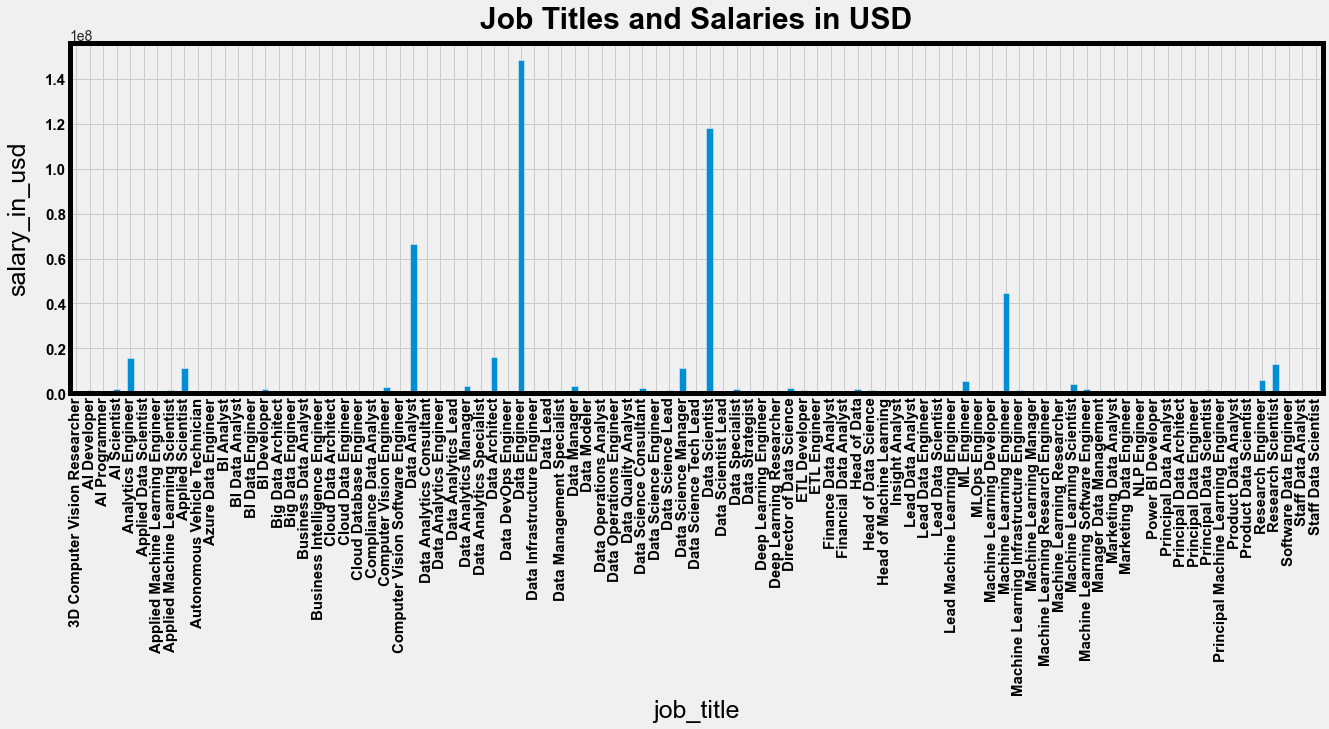

In [28]:
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 1, 1)
js.plot(kind = 'bar')
plt.xlabel('job_title', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Job Titles and Salaries in USD', fontweight = 'bold', fontsize = 30, color = 'k', pad = 15)
plt.savefig('Job Titles and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [29]:
# Data Engineer is the highest paid based on Salaries_in_USD.
# While Data Scientist and Data Analyst follow respectively 

In [30]:
es = data.groupby('experience_level')['salary_in_usd'].sum()

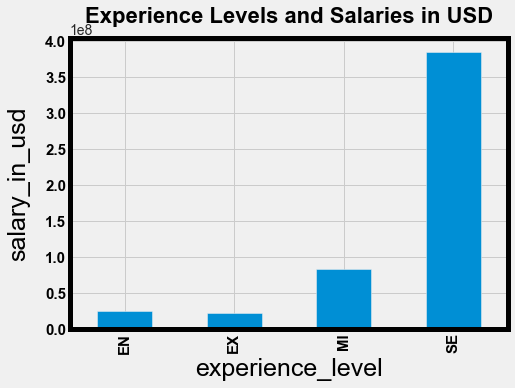

In [31]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)
es.plot(kind = 'bar')
plt.xlabel('experience_level', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Experience Levels and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Experience Levels and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [32]:
# Senior level or Expert in Data Science earns more money than other experience levels.

In [33]:
emp_sal = data.groupby('employment_type')['salary_in_usd'].sum()

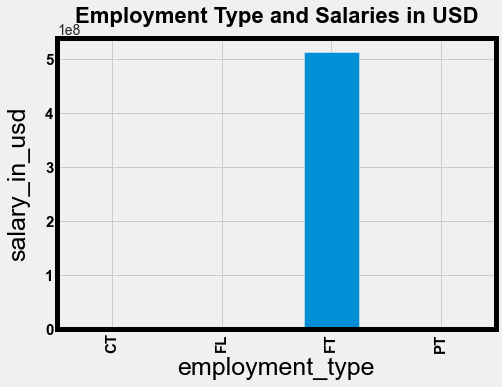

In [34]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)
emp_sal.plot(kind = 'bar')
plt.xlabel('employment_type', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Employment Type and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Employment Type and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [35]:
# Full-Time(FT) Data Scientist earns more money than other Employment Type.

In [36]:
cur_sal = data.groupby('salary_currency')['salary_in_usd'].sum()

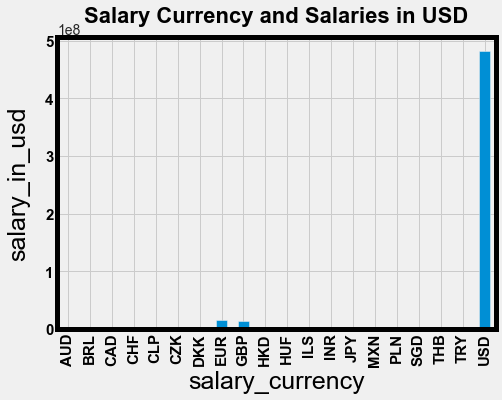

In [37]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)
cur_sal.plot(kind = 'bar')
plt.xlabel('salary_currency', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Salary Currency and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Salary Currency and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [38]:
# Data Scientists that get paid in USD earn more money than those that
# earn in other currencies.

In [39]:
empl_sal = data.groupby('employee_residence')['salary_in_usd'].sum()

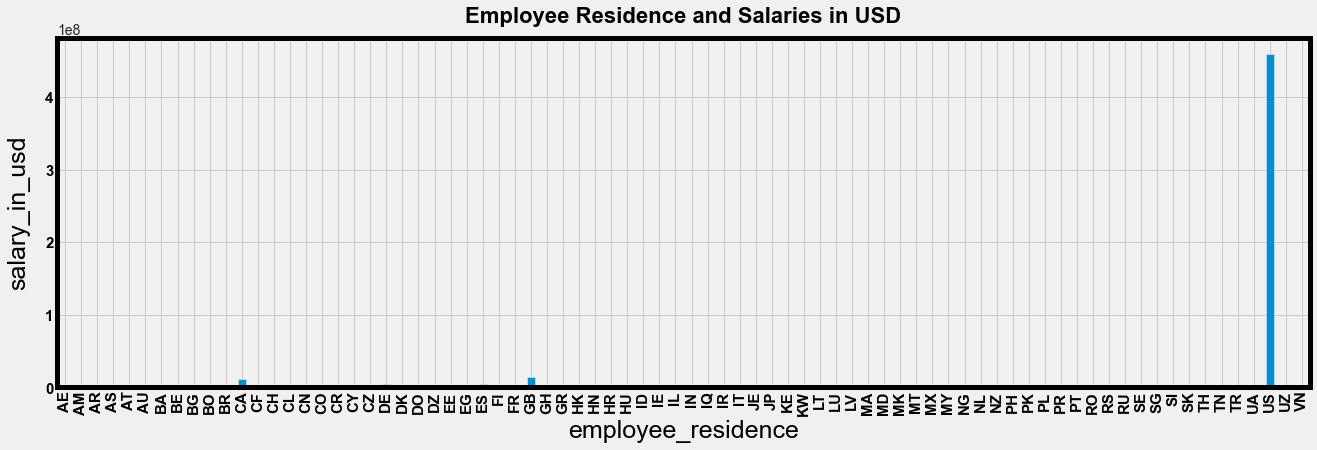

In [40]:
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 1, 1)
empl_sal.plot(kind = 'bar')
plt.xlabel('employee_residence', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Employee Residence and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Employee Residence and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [41]:
# Data Scientists that live in the US earn more money than others that live in
# other countries.

In [42]:
data.groupby('remote_ratio')['salary_in_usd'].sum()

remote_ratio
0      277520057
50      14817730
100    224239027
Name: salary_in_usd, dtype: int64

In [43]:
remote_salary = data.groupby('remote_ratio')['salary_in_usd'].sum()

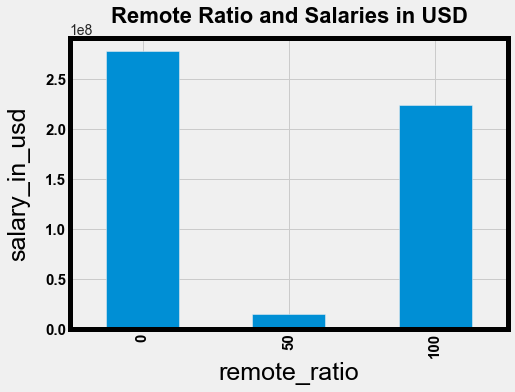

In [44]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)
remote_salary.plot(kind = 'bar')
plt.xlabel('remote_ratio', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Remote Ratio and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Remote Ratio and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [45]:
# Data Scientists that work On-Site get paid more than those that work remotely.

In [46]:
comp_sal = data.groupby('company_location')['salary_in_usd'].sum()

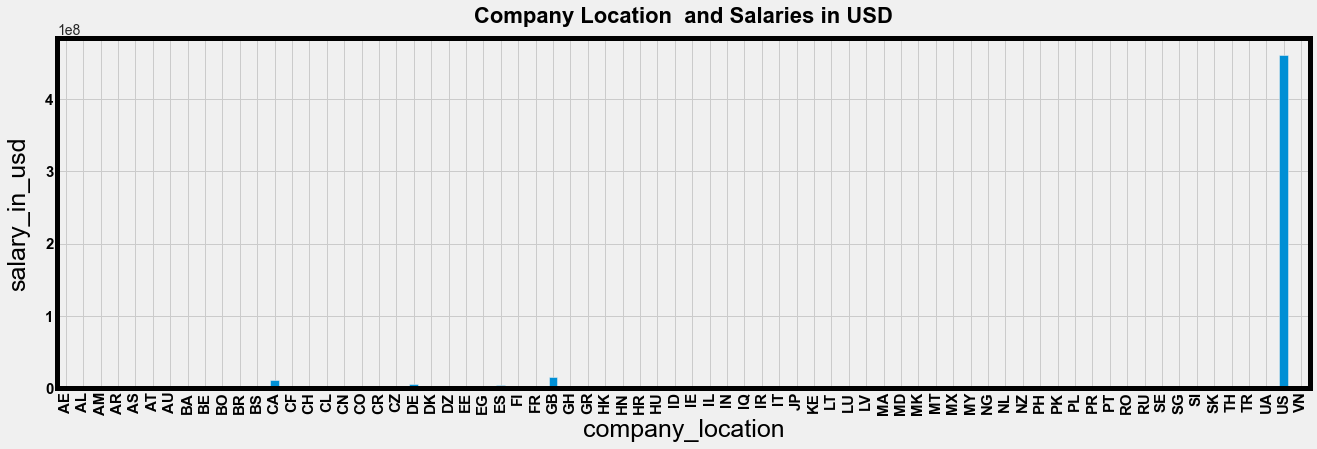

In [47]:
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 1, 1)
comp_sal.plot(kind = 'bar')
plt.xlabel('company_location', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Company Location  and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Company Location and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [48]:
# Companies located in the US pay more salaries to Data Scientists
# than other companies located elsewhere.

In [49]:
data.groupby('company_size')['salary_in_usd'].sum()

company_size
L     53708646
M    451290619
S     11577549
Name: salary_in_usd, dtype: int64

In [50]:
company_size_salary = data.groupby('company_size')['salary_in_usd'].sum()

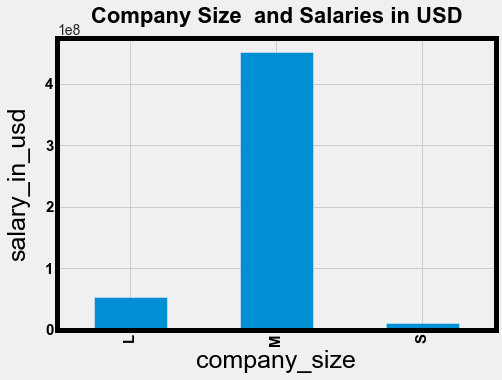

In [51]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)
company_size_salary.plot(kind = 'bar')
plt.xlabel('company_size', color = 'black', size = 25)
plt.ylabel('salary_in_usd', color = 'black', size = 25, labelpad = 15)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Company Size  and Salaries in USD', fontweight = 'bold', fontsize = 22, color = 'k', pad = 15)
plt.savefig('Company Size  and Salaries in USD', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [52]:
# Medium-sized companies pay more salaries to Data Scientists than both
# Large and Small-sized companies.